# Import Dependencies

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Data Preparation

### Read Dataset

In [2]:
data = pd.read_csv('vegemite.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15237 entries, 0 to 15236
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        15237 non-null  float64
 1   FFTE Production solids SP      15237 non-null  float64
 2   FFTE Steam pressure SP         15237 non-null  float64
 3   TFE Out flow SP                15237 non-null  float64
 4   TFE Production solids SP       15237 non-null  float64
 5   TFE Vacuum pressure SP         15237 non-null  float64
 6   TFE Steam pressure SP          15237 non-null  float64
 7   TFE Steam temperature SP       15237 non-null  float64
 8   FFTE Feed flow SP              15237 non-null  float64
 9   FFTE Out steam temp SP         15237 non-null  float64
 10  Extract tank Level             15237 non-null  float64
 11  Extract tank Out flow PV       15237 non-null  float64
 12  FFTE Discharge density         15237 non-null 

In [3]:
# Count distinct values in the 'class' column
distinct_count = data['Class'].nunique()

# Alternatively, you can use value_counts() to see counts of each distinct value
value_counts = data['Class'].value_counts()

# Display results
print(f'Distinct count: {distinct_count}')
print('Value counts:')
print(value_counts)

Distinct count: 3
Value counts:
Class
2    7548
1    5047
0    2642
Name: count, dtype: int64


## Randomly take out 1000 data points

In [4]:
# Define the number of samples for each class
samples = {0: 333, 1: 333, 2: 334}

# Randomly sample from each class
sampled_df = data.groupby('Class').apply(lambda x: x.sample(n=samples[x.name], random_state=1)).reset_index(drop=True)
# Shuffle the DataFrame
unseen_dataset_df = sampled_df.sample(frac=1, random_state=1).reset_index(drop=True)

<ipython-input-4-c4887778e893>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = data.groupby('Class').apply(lambda x: x.sample(n=samples[x.name], random_state=1)).reset_index(drop=True)


In [5]:
unseen_dataset_df.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,TFE Steam temperature SP,FFTE Feed flow SP,FFTE Out steam temp SP,...,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
0,50.0,43.0,94.00,2846.51,75.0,-60.22,120.0,80.0,10200.0,50.00,...,1333.98,0.0,68.18,1.17,119.58,64.76,46.29,70.0,-77.74,1
1,25.0,41.5,135.00,2038.55,65.0,-50.00,2.0,80.0,14000.0,50.00,...,834.63,0.0,32.29,1.20,119.91,70.21,20.93,75.0,-71.04,2
2,25.0,41.5,128.52,2035.66,72.0,-76.85,120.0,80.0,9600.0,50.00,...,1385.21,0.0,72.10,0.95,119.91,73.58,84.37,73.0,-77.39,1
3,50.0,42.0,120.00,2214.29,38.0,-65.21,120.0,80.0,9300.0,50.40,...,4762.65,0.0,67.22,1.19,124.71,85.56,83.04,85.0,-57.98,1
4,50.0,41.5,115.00,2240.02,65.0,-79.76,120.0,80.0,9380.0,40.71,...,2430.61,0.0,63.98,1.17,119.91,66.65,55.02,73.0,-73.18,0


In [6]:
unseen_dataset_df.tail()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,TFE Steam temperature SP,FFTE Feed flow SP,FFTE Out steam temp SP,...,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
995,50.0,43.0,130.82,2846.51,66.0,-75.41,120.0,80.0,10200.0,50.00,...,3077.17,0.0,-14.40,1.35,119.91,78.70,15.03,82.0,-45.29,2
996,50.0,40.5,110.00,2119.48,58.0,-77.34,125.0,80.0,9400.0,50.00,...,2795.07,0.0,51.87,1.19,119.58,69.67,82.71,69.0,-75.64,0
997,50.0,40.5,104.00,1990.32,57.0,-66.99,120.0,80.0,9700.0,50.00,...,1225.03,0.0,62.97,0.91,119.91,66.30,83.39,75.0,-72.82,2
998,50.0,43.0,130.00,2799.07,66.0,-79.04,120.0,80.0,10200.0,51.11,...,2000.65,0.0,66.30,1.20,119.91,73.71,53.93,73.0,-78.10,0
999,50.0,40.5,97.01,2525.93,62.0,-80.00,120.0,80.0,9400.0,50.00,...,596.63,0.0,66.22,1.20,120.23,71.14,32.34,72.0,-78.46,0


#### Get the remaining dataset

In [7]:
remaining_df = data.drop(unseen_dataset_df.index)

In [8]:
remaining_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14237 entries, 1000 to 15236
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        14237 non-null  float64
 1   FFTE Production solids SP      14237 non-null  float64
 2   FFTE Steam pressure SP         14237 non-null  float64
 3   TFE Out flow SP                14237 non-null  float64
 4   TFE Production solids SP       14237 non-null  float64
 5   TFE Vacuum pressure SP         14237 non-null  float64
 6   TFE Steam pressure SP          14237 non-null  float64
 7   TFE Steam temperature SP       14237 non-null  float64
 8   FFTE Feed flow SP              14237 non-null  float64
 9   FFTE Out steam temp SP         14237 non-null  float64
 10  Extract tank Level             14237 non-null  float64
 11  Extract tank Out flow PV       14237 non-null  float64
 12  FFTE Discharge density         14237 non-nu

#### Remove column with Constant value

In [9]:
remaining_df.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,TFE Steam temperature SP,FFTE Feed flow SP,FFTE Out steam temp SP,...,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
1000,50.0,41.5,122.56,2038.55,65.0,-79.73,125.0,80.0,9400.0,50.0,...,2154.34,0.0,69.63,1.22,125.03,65.69,83.99,73.0,-73.50,1
1001,50.0,41.5,122.60,2038.55,65.0,-79.73,125.0,80.0,9400.0,50.0,...,2199.09,0.0,66.51,1.22,125.03,73.26,84.03,74.0,-71.75,1
1002,50.0,41.5,122.63,2038.55,65.0,-79.73,125.0,80.0,9400.0,50.0,...,1532.43,0.0,66.51,1.22,125.03,73.26,84.08,75.0,-70.00,1
1003,50.0,41.5,122.66,2038.55,65.0,-79.73,125.0,80.0,9400.0,50.0,...,1673.80,0.0,66.51,1.22,125.03,73.26,84.18,76.0,-67.19,1
1004,50.0,41.5,122.70,2038.55,65.0,-79.73,125.0,80.0,9400.0,50.0,...,1667.32,0.0,65.64,1.22,125.03,70.05,84.26,77.0,-66.47,1


In [10]:
# Identify constant columns
constant_columns = [col for col in remaining_df.columns if remaining_df[col].nunique() == 1]

print("Constant columns:", constant_columns)

Constant columns: ['TFE Steam temperature SP', 'TFE Product out temperature']


In [11]:
remaining_df = remaining_df.drop(constant_columns, axis=1)

#### Convert column with few integer values to categorial feature

In [12]:
list_of_columns_with_few_integer = []
# Function to check for float columns with few unique integer values
def get_column_with_few_unique_float(df, max_unique=10):
    for col in df.select_dtypes(include=['float']).columns:
        unique_int_values = df[col].unique().astype(int)
        if len(set(unique_int_values)) <= max_unique:
            list_of_columns_with_few_integer.append(col)
            print(f"Column '{col}' has {len(set(unique_int_values))} unique value.")
            print(f"Unique values: {set(unique_int_values)}")
            print()

In [13]:
get_column_with_few_unique_float(remaining_df)

Column 'FFTE Feed tank level SP' has 3 unique value.
Unique values: {25, 50, 45}

Column 'FFTE Production solids SP' has 5 unique value.
Unique values: {39, 40, 41, 42, 43}

Column 'FFTE Out steam temp SP' has 5 unique value.
Unique values: {40, 49, 50, 51, 54}

Column 'FFTE Discharge density' has 2 unique value.
Unique values: {0, 1}

Column 'FFTE Pump 1' has 5 unique value.
Unique values: {0, 70, 75, 80, 50}

Column 'FFTE Pump 1 - 2' has 4 unique value.
Unique values: {0, 100, 85, 95}

Column 'FFTE Pump 2' has 5 unique value.
Unique values: {0, 65, 70, 45, 81}

Column 'TFE Motor speed' has 3 unique value.
Unique values: {80, 0, 20}

Column 'TFE Production solids density' has 2 unique value.
Unique values: {0, 1}



In [14]:
# Initialize LabelEncoder
le = LabelEncoder()
for column in list_of_columns_with_few_integer:
    remaining_df[column] = le.fit_transform(remaining_df[column])
remaining_df.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,...,TFE Motor speed,TFE Out flow PV,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
1000,2,5,122.56,2038.55,65.0,-79.73,125.0,9400.0,3,61.30,...,2,2154.34,69.63,39,125.03,65.69,83.99,73.0,-73.50,1
1001,2,5,122.60,2038.55,65.0,-79.73,125.0,9400.0,3,61.51,...,2,2199.09,66.51,39,125.03,73.26,84.03,74.0,-71.75,1
1002,2,5,122.63,2038.55,65.0,-79.73,125.0,9400.0,3,61.36,...,2,1532.43,66.51,39,125.03,73.26,84.08,75.0,-70.00,1
1003,2,5,122.66,2038.55,65.0,-79.73,125.0,9400.0,3,61.55,...,2,1673.80,66.51,39,125.03,73.26,84.18,76.0,-67.19,1
1004,2,5,122.70,2038.55,65.0,-79.73,125.0,9400.0,3,61.94,...,2,1667.32,65.64,39,125.03,70.05,84.26,77.0,-66.47,1


### Balance Distribution Checking

#### Plot the Distribution

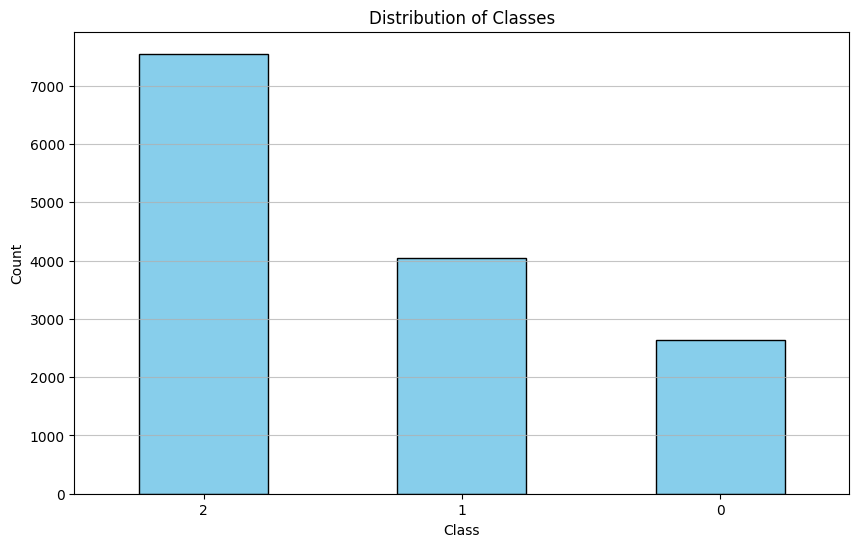

In [15]:
# Plotting the distribution using Matplotlib
plt.figure(figsize=(10, 6))
remaining_df['Class'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Undersampling the Majority Class

In [16]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(remaining_df.drop(columns=['Class']), remaining_df['Class'])

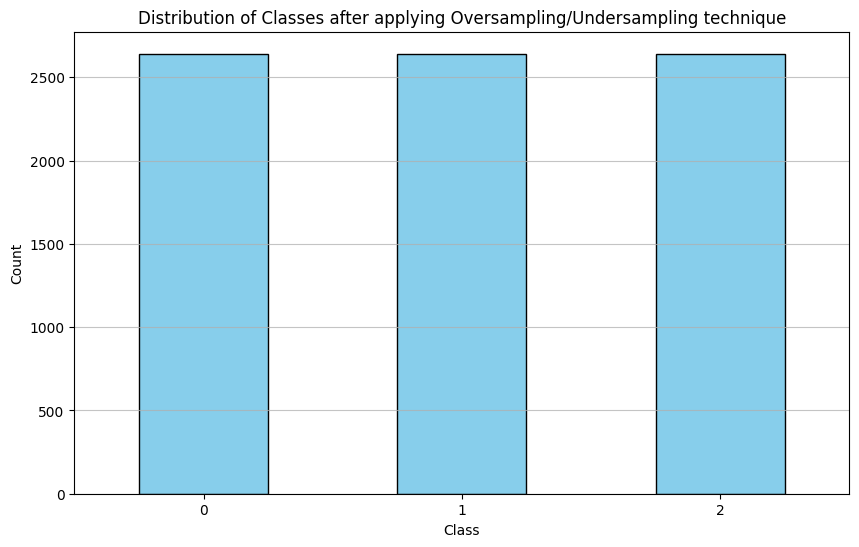

In [17]:
# Plotting the distribution using Matplotlib
plt.figure(figsize=(10, 6))
y_resampled.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Classes after applying Oversampling/Undersampling technique')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', alpha=0.75)
plt.show()

### Data exploration

#### Data Distribution

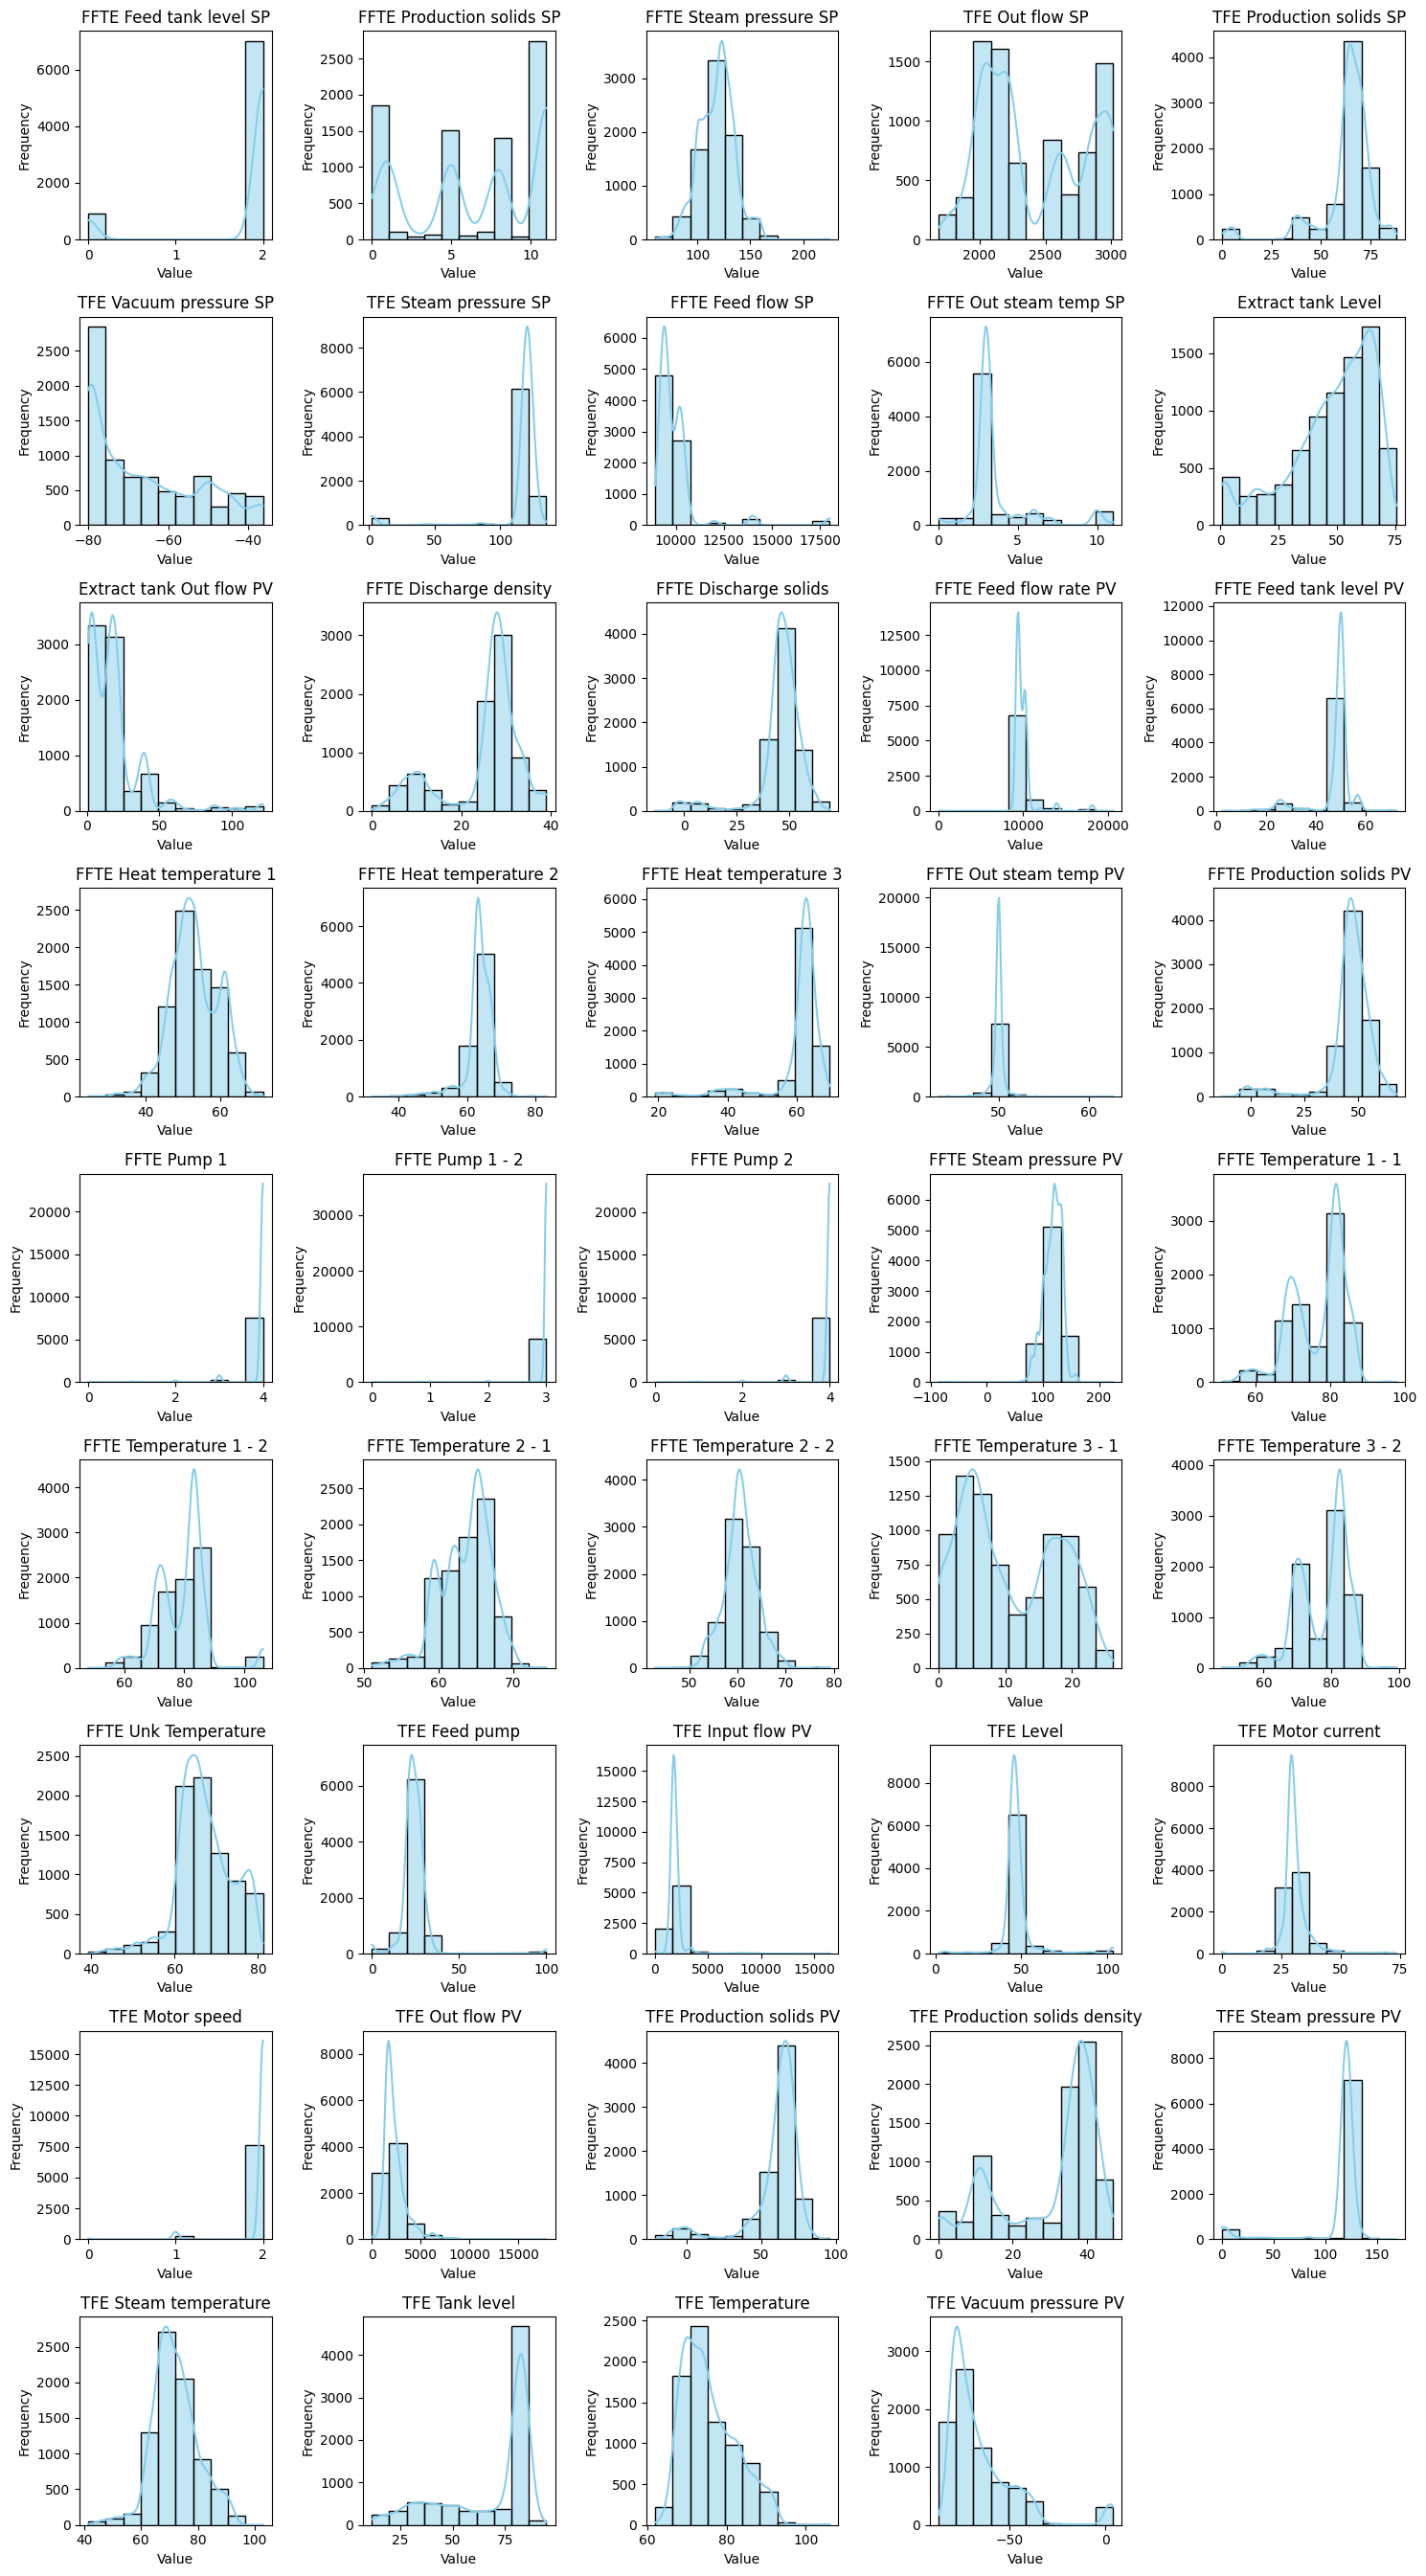

In [18]:
# Set the number of features
num_features = X_resampled.select_dtypes(include='number').shape[1]
features = X_resampled.select_dtypes(include='number').columns

# Define the number of columns for the plot grid
num_cols = 5  # You can adjust this based on your preference
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create a single figure with a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plotting the distribution for each feature in smaller axes
for i, column in enumerate(features):
    sns.histplot(X_resampled[column], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Create Composite Features

In [19]:
X_resampled['rms FFTE Heat temperature'] = ((X_resampled['FFTE Heat temperature 1']**2 + X_resampled['FFTE Heat temperature 1']**2 + X_resampled['FFTE Heat temperature 3']**2) / 3)**0.5
X_resampled['rms FFTE Temperature'] = (
    (X_resampled['FFTE Temperature 1 - 2']**2 + X_resampled['FFTE Temperature 2 - 1']**2 + X_resampled['FFTE Temperature 2 - 2']**2 + X_resampled['FFTE Temperature 3 - 1']**2 + X_resampled['FFTE Temperature 3 - 2']**2 + X_resampled['FFTE Unk Temperature']**2) / 6
)**0.5


In [20]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7926 entries, 5047 to 14276
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        7926 non-null   int64  
 1   FFTE Production solids SP      7926 non-null   int64  
 2   FFTE Steam pressure SP         7926 non-null   float64
 3   TFE Out flow SP                7926 non-null   float64
 4   TFE Production solids SP       7926 non-null   float64
 5   TFE Vacuum pressure SP         7926 non-null   float64
 6   TFE Steam pressure SP          7926 non-null   float64
 7   FFTE Feed flow SP              7926 non-null   float64
 8   FFTE Out steam temp SP         7926 non-null   int64  
 9   Extract tank Level             7926 non-null   float64
 10  Extract tank Out flow PV       7926 non-null   float64
 11  FFTE Discharge density         7926 non-null   int64  
 12  FFTE Discharge solids          7926 non-null   fl

# Step 2: Feature selection, Model Training and Evaluation

#### Feature Selection

Using 2 created composite features, and the best 10 features using PCA

In [21]:
pca = PCA(n_components=10).fit(X_resampled.drop(columns=['rms FFTE Heat temperature', 'rms FFTE Temperature']))
X_train_pca = pca.fit_transform(X_resampled.drop(columns=['rms FFTE Heat temperature', 'rms FFTE Temperature']))

print(X_train_pca.shape)

(7926, 10)


In [22]:
# Concatenate the NumPy matrix and the reshaped Series along axis 1 (columns)
X_dataset = np.concatenate((X_train_pca, X_resampled['rms FFTE Heat temperature'].values.reshape(-1, 1)), axis=1)
X_dataset = np.concatenate((X_dataset, X_resampled['rms FFTE Temperature'].values.reshape(-1, 1)), axis=1)

In [23]:
print(X_dataset.shape)

(7926, 12)


#### Model Training


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_resampled, test_size=0.3, random_state=1
)

##### SVM

In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score

SVM_model = svm.SVC()
SVM_history = SVM_model.fit(X_train, y_train)
SVM_y_pred = SVM_model.predict(X_test)
accuracy_score(y_test,SVM_y_pred)

0.5004205214465938

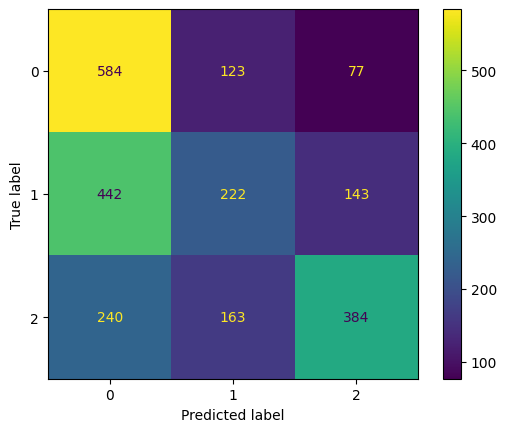

In [29]:
ConfusionMatrixDisplay.from_estimator(SVM_model, X_test, y_test)

In [31]:
print(classification_report(y_test, SVM_y_pred))

              precision    recall  f1-score   support

           0       0.46      0.74      0.57       784
           1       0.44      0.28      0.34       807
           2       0.64      0.49      0.55       787

    accuracy                           0.50      2378
   macro avg       0.51      0.50      0.49      2378
weighted avg       0.51      0.50      0.49      2378



##### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()
DT_history = DT_model.fit(X_train, y_train)
DT_y_pred = DT_model.predict(X_test)
accuracy_score(y_test,DT_y_pred)

0.8212783851976451

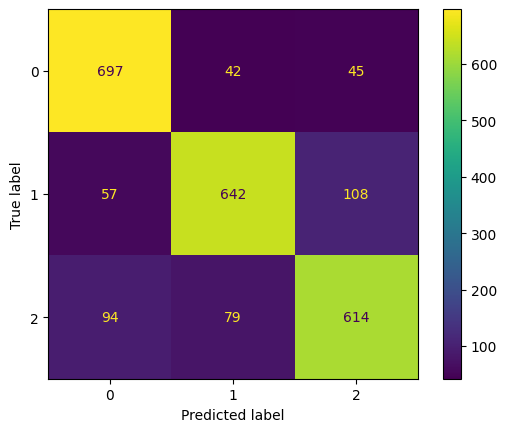

In [34]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test, y_test)

In [36]:
print(classification_report(y_test, DT_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       784
           1       0.84      0.80      0.82       807
           2       0.80      0.78      0.79       787

    accuracy                           0.82      2378
   macro avg       0.82      0.82      0.82      2378
weighted avg       0.82      0.82      0.82      2378



##### MLP

In [37]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier()
MLP_history = MLP_model.fit(X_train, y_train)
MLP_y_pred = MLP_model.predict(X_test)
accuracy_score(y_test,MLP_y_pred)

0.5592935239697224

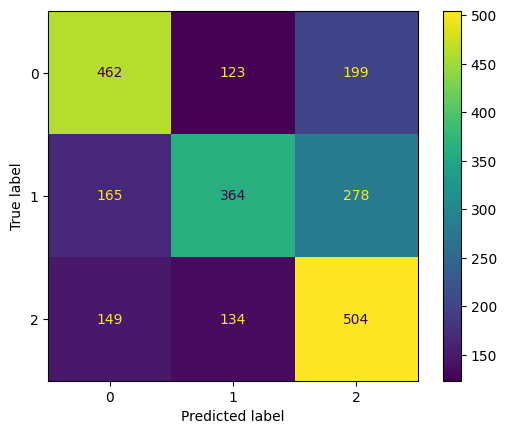

In [38]:
ConfusionMatrixDisplay.from_estimator(MLP_model, X_test, y_test)

In [39]:
print(classification_report(y_test, MLP_y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59       784
           1       0.59      0.45      0.51       807
           2       0.51      0.64      0.57       787

    accuracy                           0.56      2378
   macro avg       0.57      0.56      0.56      2378
weighted avg       0.57      0.56      0.56      2378



Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_history = RF_model.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_test)
accuracy_score(y_test,RF_y_pred)

0.9352396972245585

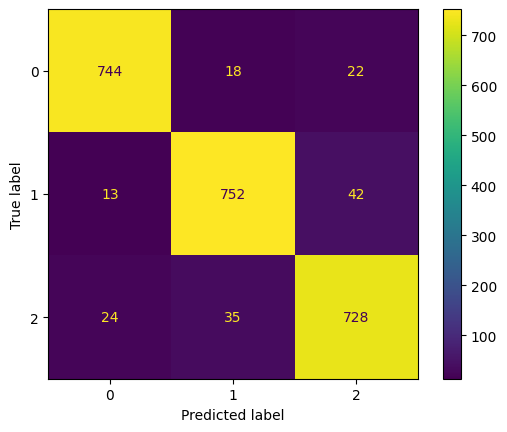

In [41]:
ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test)

In [42]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       784
           1       0.93      0.93      0.93       807
           2       0.92      0.93      0.92       787

    accuracy                           0.94      2378
   macro avg       0.94      0.94      0.94      2378
weighted avg       0.94      0.94      0.94      2378



##### Simple Neural Networks

In [43]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

ANN_model = models.Sequential()
ANN_model.add(layers.Dense(32, activation='tanh', input_shape=(X_train.shape[1],)))
ANN_model.add(layers.Dense(32, activation='sigmoid'))
ANN_model.add(layers.Dense(3, activation='softmax'))
ANN_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

ANN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,571 (6.14 KB)

 Trainable params: 1,571 (6.14 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
encoded_y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
print(encoded_y_train.shape)
print(X_train.shape)
print(type(encoded_y_train))
print(type(X_train))

(5548, 3)
(5548, 12)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [45]:
ANN_history = ANN_model.fit(X_train, encoded_y_train, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:567: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3720 - loss: 1.1117
Epoch 2/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4528 - loss: 1.0385
Epoch 3/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4602 - loss: 1.0251
Epoch 4/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4805 - loss: 1.0197
Epoch 5/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4693 - loss: 1.0050
Epoch 6/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4846 - loss: 1.0044
Epoch 7/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4893 - loss: 1.0027
Epoch 8/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4916 - loss: 1.0013
Epoch 9/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 1.0038
Epoch 10/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4952 - loss: 1.0033
Epoch 11/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4982 - loss: 0.9975
Epoch 12/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy

In [46]:
encoded_y_test = encoder.fit_transform(y_test.values.reshape(-1, 1))
ANN_y_pred = ANN_model.predict(X_test)
accuracy_score(y_test,ANN_y_pred.argmax(axis=1))

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.5042052144659378

##### Save the model with the best performance

In [49]:
import joblib

joblib.dump(RF_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

# Step 3: ML to AI

### Load the model

In [50]:
# Load the model from the file
loaded_rf_model = joblib.load('random_forest_model.joblib')

### Process 1000 unseen data

#### Encoding the label

In [51]:
# Initialize LabelEncoder
le = LabelEncoder()
for column in list_of_columns_with_few_integer:
    unseen_dataset_df[column] = le.fit_transform(unseen_dataset_df[column])
unseen_dataset_df.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,TFE Steam temperature SP,FFTE Feed flow SP,FFTE Out steam temp SP,...,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
0,1,10,94.00,2846.51,75.0,-60.22,120.0,80.0,10200.0,3,...,1333.98,0.0,68.18,32,119.58,64.76,46.29,70.0,-77.74,1
1,0,5,135.00,2038.55,65.0,-50.00,2.0,80.0,14000.0,3,...,834.63,0.0,32.29,35,119.91,70.21,20.93,75.0,-71.04,2
2,0,5,128.52,2035.66,72.0,-76.85,120.0,80.0,9600.0,3,...,1385.21,0.0,72.10,16,119.91,73.58,84.37,73.0,-77.39,1
3,1,8,120.00,2214.29,38.0,-65.21,120.0,80.0,9300.0,7,...,4762.65,0.0,67.22,34,124.71,85.56,83.04,85.0,-57.98,1
4,1,5,115.00,2240.02,65.0,-79.76,120.0,80.0,9380.0,0,...,2430.61,0.0,63.98,32,119.91,66.65,55.02,73.0,-73.18,0


#### Create Composite Features

In [52]:
unseen_dataset_df['rms FFTE Heat temperature'] = ((unseen_dataset_df['FFTE Heat temperature 1']**2 + unseen_dataset_df['FFTE Heat temperature 1']**2 + unseen_dataset_df['FFTE Heat temperature 3']**2) / 3)**0.5
unseen_dataset_df['rms FFTE Temperature'] = (
    (unseen_dataset_df['FFTE Temperature 1 - 2']**2 + unseen_dataset_df['FFTE Temperature 2 - 1']**2 + unseen_dataset_df['FFTE Temperature 2 - 2']**2 + unseen_dataset_df['FFTE Temperature 3 - 1']**2 + unseen_dataset_df['FFTE Temperature 3 - 2']**2 + unseen_dataset_df['FFTE Unk Temperature']**2) / 6
)**0.5


In [53]:
unseen_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        1000 non-null   int64  
 1   FFTE Production solids SP      1000 non-null   int64  
 2   FFTE Steam pressure SP         1000 non-null   float64
 3   TFE Out flow SP                1000 non-null   float64
 4   TFE Production solids SP       1000 non-null   float64
 5   TFE Vacuum pressure SP         1000 non-null   float64
 6   TFE Steam pressure SP          1000 non-null   float64
 7   TFE Steam temperature SP       1000 non-null   float64
 8   FFTE Feed flow SP              1000 non-null   float64
 9   FFTE Out steam temp SP         1000 non-null   int64  
 10  Extract tank Level             1000 non-null   float64
 11  Extract tank Out flow PV       1000 non-null   float64
 12  FFTE Discharge density         1000 non-null   in

#### Feature Selection

Using 2 created composite features, and the best 10 features using PCA

In [54]:
pca = PCA(n_components=10).fit(unseen_dataset_df.drop(columns=['rms FFTE Heat temperature', 'rms FFTE Temperature', 'Class']))
unseen_X_train_pca = pca.fit_transform(unseen_dataset_df.drop(columns=['rms FFTE Heat temperature', 'rms FFTE Temperature', 'Class']))

In [55]:
print(unseen_X_train_pca.shape)

(1000, 10)


In [56]:
# Concatenate the NumPy matrix and the reshaped Series along axis 1 (columns)
unseen_X_dataset = np.concatenate((unseen_X_train_pca, unseen_dataset_df['rms FFTE Heat temperature'].values.reshape(-1, 1)), axis=1)
unseen_X_dataset = np.concatenate((unseen_X_dataset, unseen_dataset_df['rms FFTE Temperature'].values.reshape(-1, 1)), axis=1)

In [57]:
print(unseen_X_dataset.shape)

(1000, 12)


#### Test the unseen data

In [58]:
predictions = loaded_rf_model.predict(unseen_X_dataset)

In [59]:
accuracy_score(unseen_dataset_df['Class'],predictions)

0.753

In [61]:
print(classification_report(unseen_dataset_df['Class'], predictions))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       333
           1       0.72      0.74      0.73       333
           2       0.70      0.79      0.74       334

    accuracy                           0.75      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.75      0.75      1000

